In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np
import warnings
import glob, os, shutil
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:/Users/robin/Programs/Candy_Collect/Grant/Database/')

In [3]:
df_C = pd.read_csv('SBR_C.csv')
df_K = pd.read_csv('SBR_K.csv')

In [4]:
df_C['avg'] = df_C[['N1', 'N2', 'N3', 'N4']].mean(axis=1)
df_C['stnd'] = df_C[['N1', 'N2', 'N3', 'N4']].std(axis=1)
df_C['err'] = df_C['stnd']/4
df_C['threshold'] = df_C.avg[0] + 3*df_C.stnd[0]
df_C['bacterial_load'] = [0, 1*10**5, 1.5*10**5, 5*10**5, 1*10**6, 5*10**6, 1*10**7, 1*10**9]

df_K['avg'] = df_K[['N1', 'N2', 'N3', 'N4']].mean(axis=1)
df_K['stnd'] = df_K[['N1', 'N2', 'N3', 'N4']].std(axis=1)
df_K['err'] = df_K['stnd']/4
df_K['threshold'] = df_K.avg[0] + 3*df_K.stnd[0]
df_K['bacterial_load'] = [0, 1*10**5, 1.5*10**5, 5*10**5, 1*10**6, 5*10**6, 1*10**7, 1*10**9]

In [5]:
lim = np.amax(np.amax(df_K[['N1', 'N2', 'N3', 'N4']])) - 0.04

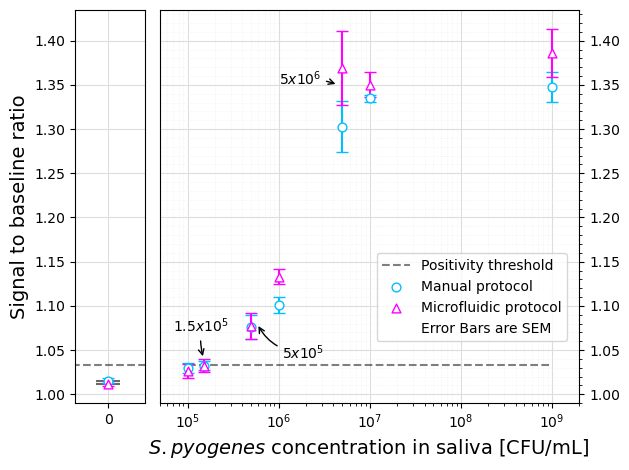

In [6]:
f, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 6]})
axes[1].yaxis.tick_right()
axes[1].set_xscale("log")
axes[1].set_ylim(0.99,lim)
axes[0].set_ylim(0.99,lim)
axes[0].set_xlim(-.9, 1)
axes[0].yaxis.grid(which='major', color='#DDDDDD', zorder = 0, linewidth=0.8)
axes[0].xaxis.grid(which='major', color='#DDDDDD', zorder = 0, linewidth=0.8)
axes[0].set_xticks([0])
axes[0].set_ylabel('Signal to baseline ratio', fontsize = 14)
alpha = 1
color1, color2, color3, color4 = 'deepskyblue', 'magenta', 'darkorange', 'lightorange'
s=40

axes[0].scatter(df_C.bacterial_load.iloc[0], df_C.avg.iloc[0], facecolors='white', edgecolor=color1, zorder = 3, linewidths=1, alpha = alpha, marker='o', s = s)

axes[0].scatter(df_C.bacterial_load.iloc[0], df_C.avg.iloc[0], c='dimgray', marker = '_', s = 300)
axes[0].errorbar(df_C.bacterial_load.iloc[0], df_C.avg.iloc[0], df_C.stnd.iloc[0]/(4**.5), marker = '_', c = 'none', ecolor = color1, capsize = 4)

axes[1].scatter(df_C.bacterial_load.iloc[1:], df_C.avg.iloc[1:], facecolors='white', edgecolor=color1, linewidths=1, alpha = alpha, zorder = 3, marker='o', s = s) 
axes[1].errorbar(df_C.bacterial_load.iloc[1:], df_C.avg.iloc[1:], df_C.stnd.iloc[1:]/(4**.5), marker = '_', color = 'none', ecolor = color1, capsize = 4)

axes[1].plot(df_C.bacterial_load.iloc[1:], df_C.threshold.iloc[1:], label = 'Positivity threshold', linestyle = 'dashed', c='k', alpha = 0.5)
axes[0].plot([-1, 1], df_C.threshold.values[:2], linestyle = 'dashed', c='k', alpha = 0.5)
    
axes[1].scatter(df_C.bacterial_load.iloc[0], df_C.avg.iloc[0], facecolors='white', edgecolor=color1, linewidths=1, alpha = alpha, zorder = 3, marker='o', s = s, label = 'Manual protocol')
# axes[1].scatter(df_C.bacterial_load.iloc[0], df_C.avg.iloc[0], c='dimgray', marker = '_', alpha=0.4, s = 200, label = 'Standard error of the mean')

axes[0].scatter(df_K.bacterial_load.iloc[0], df_K.avg.iloc[0], facecolors='white', edgecolor=color2, zorder = 3, linewidths=1, alpha = alpha, marker='^', s = s)

axes[0].scatter(df_K.bacterial_load.iloc[0], df_K.avg.iloc[0], c='dimgray', marker = '_', s = 300)
axes[0].errorbar(df_K.bacterial_load.iloc[0], df_K.avg.iloc[0], df_K.stnd.iloc[0]/(4**.5), marker = '_', c = color2, ecolor = color2, capsize = 4)

axes[1].scatter(df_K.bacterial_load.iloc[1:], df_K.avg.iloc[1:], facecolors='white', edgecolor=color2, linewidths=1, alpha = alpha, zorder = 3, marker='^', s = s) 
axes[1].errorbar(df_K.bacterial_load.iloc[1:], df_K.avg.iloc[1:], df_K.stnd.iloc[1:]/(4**.5), marker = '_', color = 'none', ecolor = color2, capsize = 4)

# axes[1].plot(df_K.bacterial_load.iloc[1:], df_K.threshold.iloc[1:],  linestyle = 'dashed', c=color2, alpha = 0.5)
# axes[0].plot([-1, 1], df_K.threshold.values[:2], linestyle = 'dashed', c=color2, alpha = 0.5)
    
axes[1].scatter(df_K.bacterial_load.iloc[0], df_K.avg.iloc[0], facecolors='white', edgecolor=color2, linewidths=1, alpha = alpha, zorder = 3, marker='^', s = s, label = 'Microfluidic protocol')
axes[1].scatter(df_K.bacterial_load.iloc[0], df_K.avg.iloc[0], c= 'none', marker = '_', alpha=0.4, s = 200, label = 'Error Bars are SEM')

axes[1].annotate(r"$1.5x10^{5}$", xy=(150000, 1.04), xytext=(70000,1.07), arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.1'},horizontalalignment='left')
axes[1].annotate(r"$5x10^{5}$", xy=(580000, 1.08), xytext=(1100000,1.04), arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.3'},horizontalalignment='left')
axes[1].annotate(r"$5x10^{6}$", xy=(4500000, 1.35), xytext=(1000000,1.35), arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=-0.1'},horizontalalignment='left')

plt.subplots_adjust(wspace=.05, hspace=0)

plt.xlabel('$\it{S. pyogenes}$ concentration in saliva [CFU/mL] ', fontsize = 14)
axes[1].set_xlim(.5*10**5, 2*10**9)
axes[0].set_facecolor('white')
axes[1].set_facecolor('white')
plt.minorticks_on()
plt.grid(which='both', zorder = 0)
# plt.legend(facecolor='white', bbox_to_anchor=(1.437,1))
plt.legend(facecolor='white', bbox_to_anchor=(.5, .14))
plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder = 0)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5, zorder = 0)
plt.tight_layout()
f.savefig('combined.png', dpi = 900)

plt.show()